In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/time-series-air-quality-data-of-india-2010-2023'):
#     for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')

In [3]:
df.count()

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
type(df['loan_int_rate'])

pandas.core.series.Series

In [6]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(0)
df['person_emp_length'] = df['person_emp_length'].fillna(0)

In [7]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df['person_income'] = df['person_income'].astype(float)

In [10]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,9.958552,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,4.470390,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.620000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900.0,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100.0,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956.0,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000.0,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000.0,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


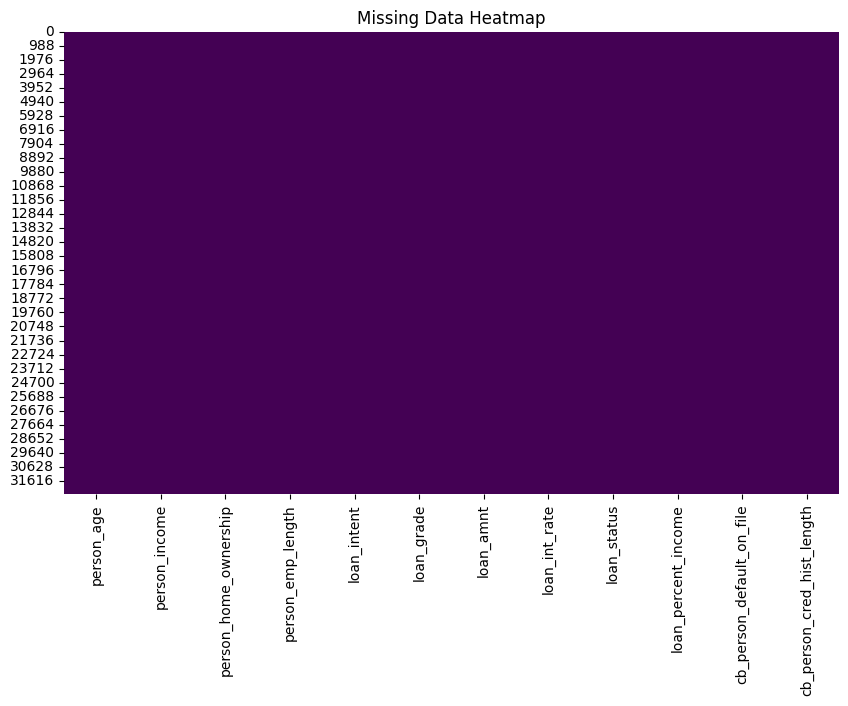

In [12]:
# Check for missing data
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


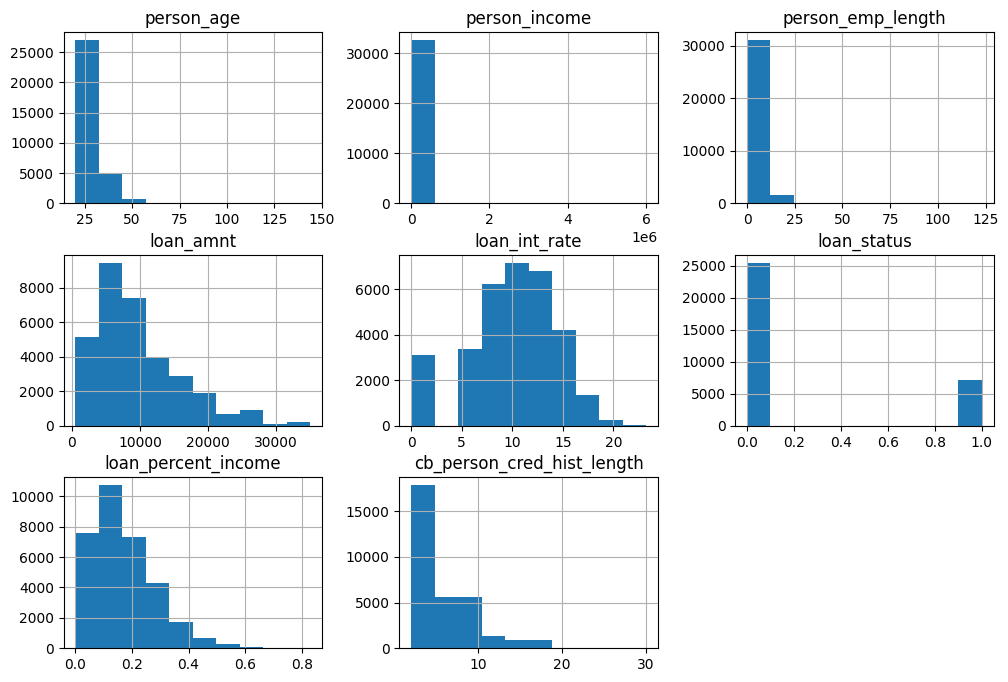

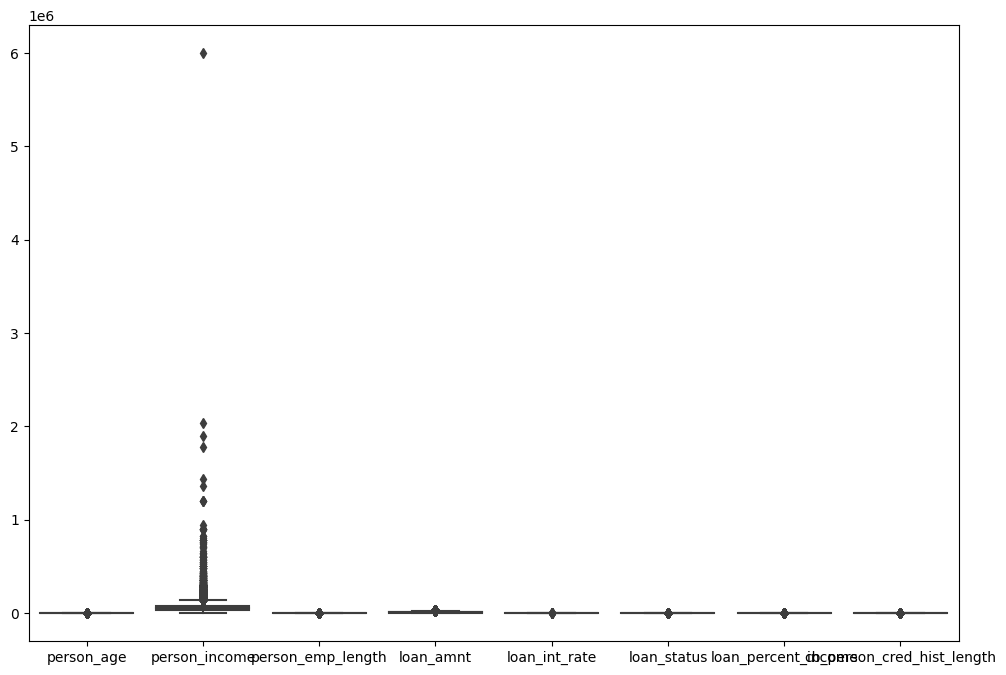

In [13]:
# Histograms for numerical columns
df.hist(figsize=(12, 8))
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='v') 
plt.show()


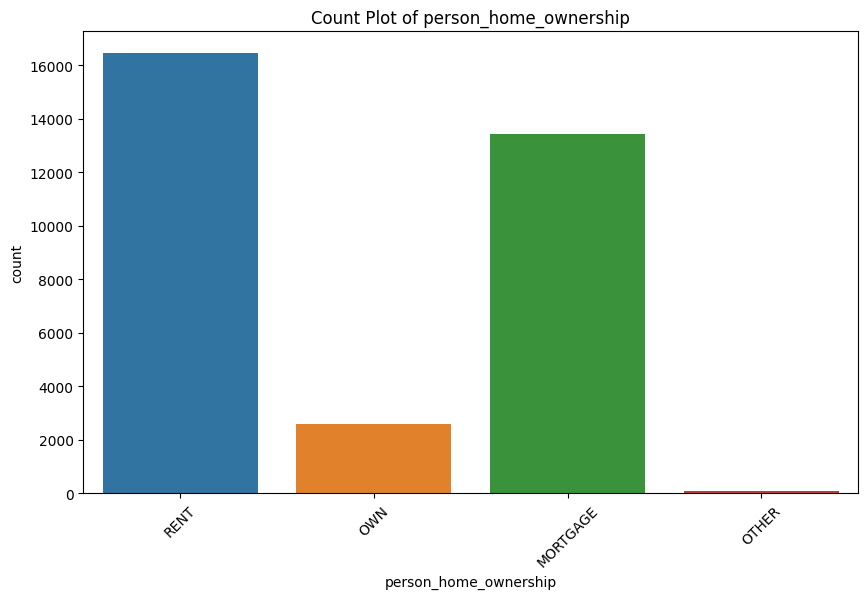

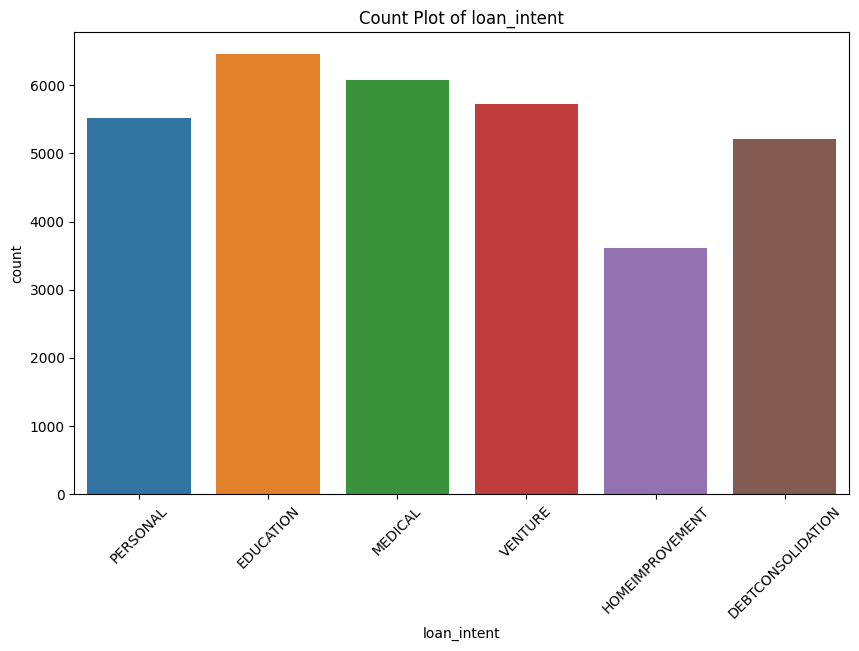

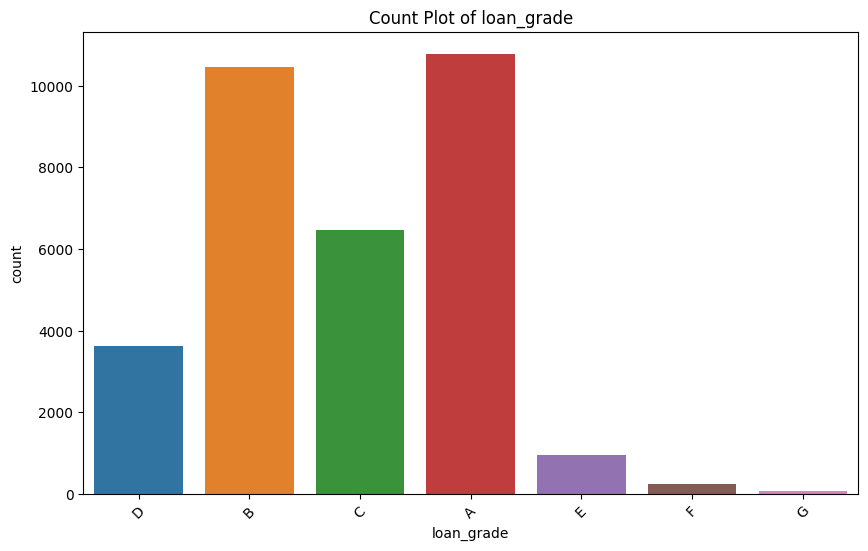

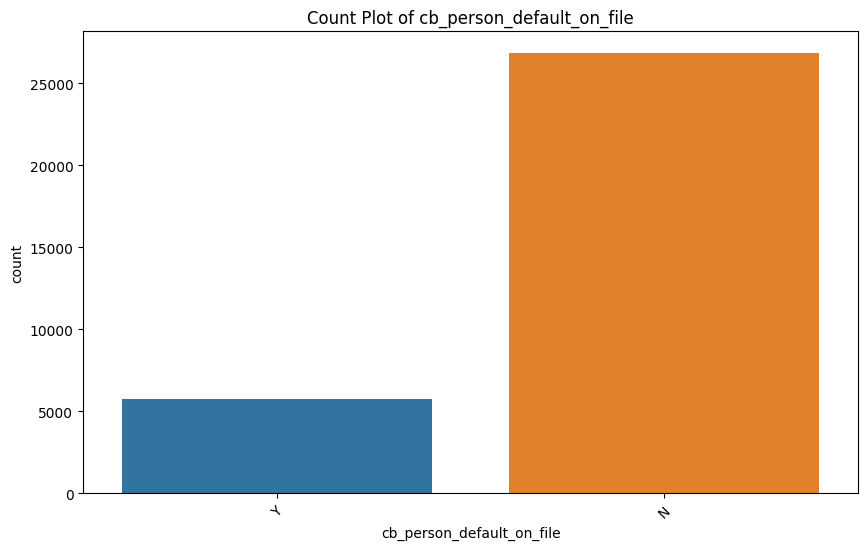

In [14]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


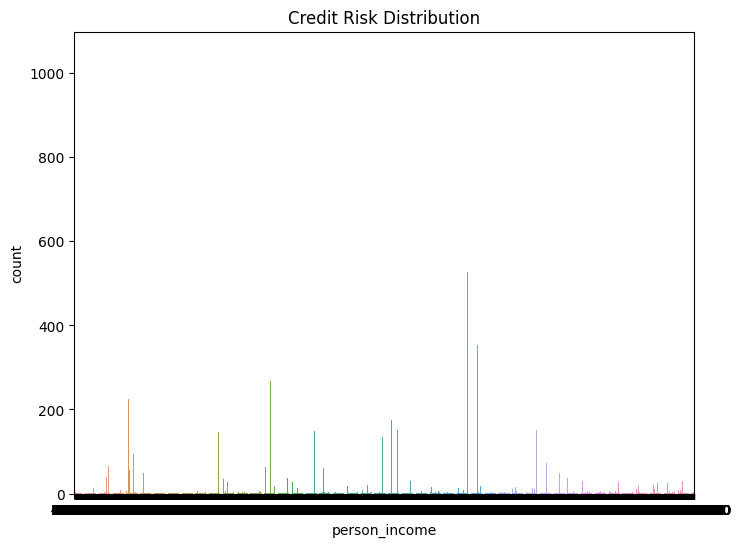

In [15]:
# Credit risk distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=df['person_income'], data=df)
plt.title('Credit Risk Distribution')
plt.show()

# Explore other relevant metrics such as income, loan amount, etc. in the context of credit risk


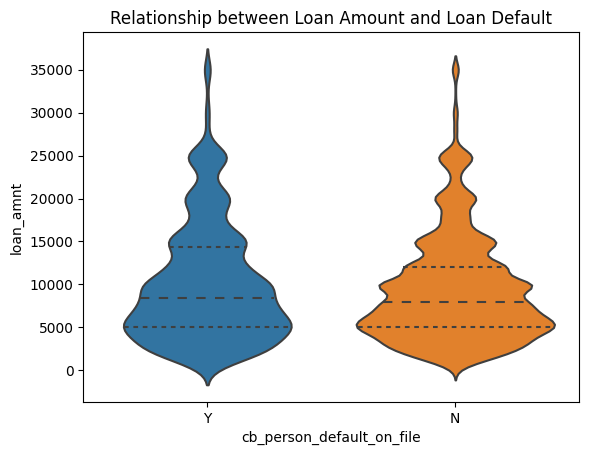

In [16]:
# Violin plot
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype(str)  # Convert 'loan_default' to a string for better visualization
# df['loan_percentage_income'] = df['loan_percentage_income'].astype(float)  # Convert to float if not already

ax = sns.violinplot(x='cb_person_default_on_file', y='loan_amnt', data=df, inner="quart")
ax.set_title("Relationship between Loan Amount and Loan Default")

plt.show()

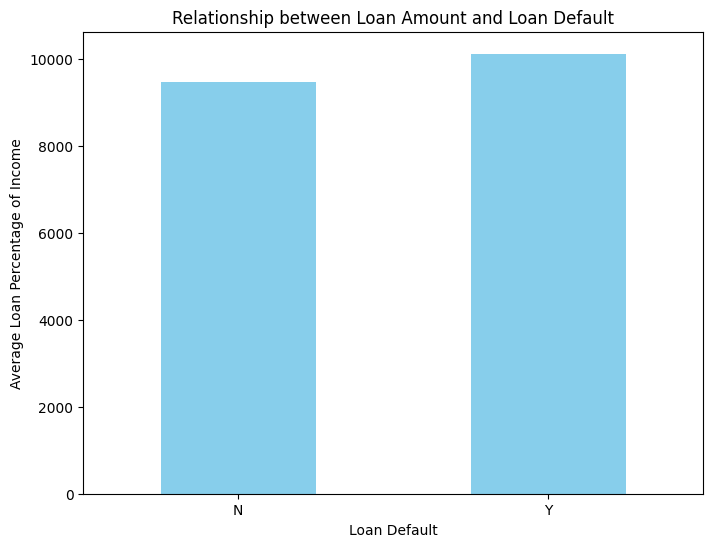

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'loan_percentage_income' and 'loan_default'

# Group the data by 'loan_default' and calculate the mean loan_percentage_income for each category
grouped = df.groupby('cb_person_default_on_file')['loan_amnt'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color='skyblue')
plt.xlabel('Loan Default')
plt.ylabel('Average Loan Percentage of Income')
plt.title('Relationship between Loan Amount and Loan Default')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()
